# Lec4 다변수 선형 회귀
- [Lec3](./Lec3.ipynb)에서 했던 거에서 여러 식인 경우
- $H(x_1, x_2, x_3) = w_1 x_1 + w_2 x_2 + x_3 x_3 + b$로 확장하면 됨
- 그냥 쓰면 불편하니까 행렬로 쓴다
-  $H(X) = XW$

- [tf2-04-1-multi_variable_linear_regression.py][reg] 참조

[reg]: https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-04-1-multi_variable_linear_regression.py

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]


In [6]:
mymodel = tf.keras.Sequential()

mymodel.add(tf.keras.layers.Dense(units=1, input_dim=3))  # input_dim=3 gives multi-variable regression
mymodel.add(tf.keras.layers.Activation('linear'))  # this line can be omitted, as linear activation is default
# advanced reading https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

mymodel.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))
mymodel.summary()
history = mymodel.fit(x_data, y_data, epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


c:\Users\User\OneDrive - SNU\2022\computer\learn_ML\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 326ms/step - loss: 51581.5117
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 16174.0654
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 5075.7100
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 1596.9608
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 506.5547
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 164.7673
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 57.6321
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 24.0477
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5175
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2138
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1751
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 8.8464
Epoch 13/100
1/1 [===================

In [8]:
y_predict = mymodel.predict(np.array([[72., 93., 90.]]))
print(y_predict)

1/1 [==============================] - 0s 85ms/step
[[151.20686]]


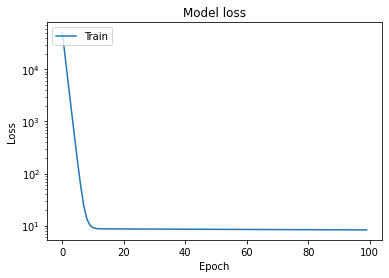

In [9]:
# Plot training & validation loss values
plt.plot(history.history['loss'][0:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.yscale('log')
plt.show()